<a href="https://colab.research.google.com/github/rafiff18/Machine-Learning-Ti-2b/blob/main/Yolo_4_33_23_1_18_Muhammad_Rafif_Pasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Latihan dan Soal

Berikut beberapa pertanyaan dan tugas untuk menguji pemahaman Anda mengenai YOLO serta kemampuan Anda mengaplikasikannya:

**A. Pertanyaan Teoretis:**

1. **Anchor-based vs Anchor-free:** Jelaskan perbedaan antara *object detector* yang berbasis anchor dan yang anchor-free. Sebutkan contoh detector anchor-based dan anchor-free, serta diskusikan kelebihan dan kekurangan masing-masing.
2. **Evolusi Arsitektur:** Sebutkan tiga peningkatan utama yang diperkenalkan pada YOLOv4 dibanding YOLOv3. Mengapa peningkatan tersebut dapat memperbaiki kinerja deteksi?
3. **Konsep IoU dan Confidence:** Apa itu *Intersection over Union (IoU)* dan bagaimana IoU digunakan dalam metrik evaluasi dan proses inferensi YOLO (misalnya dalam perhitungan confidence score di YOLOv1 dan dalam algoritma Non-Maximum Suppression)?
4. **Multi-Scale Prediction:** Mengapa YOLOv3 menambahkan mekanisme prediksi multi-skala (dari fitur map ukuran berbeda)? Masalah apa pada YOLOv2 yang coba diatasi dengan pendekatan ini?

**B. Tugas Praktik:**

1. **Deteksi Gambar Tunggal:** Pilih sebuah gambar yang mengandung multiple objek (misal foto keramaian atau situasi jalan raya). Jalankan deteksi objek pada gambar tersebut menggunakan *model YOLOv8 pre-trained*. Tampilkan gambar hasil deteksinya (dengan bounding box) dan berikan analisis: objek apa saja yang berhasil terdeteksi, adakah objek yang luput atau salah label? Bagaimana confidence score-nya, apakah masuk akal?
2. **Deteksi pada Video:** Jika memungkinkan, lakukan deteksi real-time pada sebuah cuplikan video pendek menggunakan YOLO (bisa YOLOv5 atau YOLOv8). Anda dapat memproses video frame-by-frame di Colab. Hitung berapa FPS pemrosesan yang dicapai dan observasi stabilitas deteksi antar frame (apakah ada objek yang muncul/hilang tiba-tiba di antara frame?).
3. **Fine-tuning Kustom:** Ambil dataset kecil dan latih model YOLO (v5 atau v8) pada dataset tersebut. Catat nilai loss dan mAP selama training. Setelah training, uji model pada beberapa gambar uji. Apresentasikan hasilnya: apakah model berhasil mengenali objek kustom dengan baik? Apa kendala yang Anda hadapi selama training (misal overfitting, data kurang, dll.)?
4. **Model YOLO yang lebih baru:** Saat ini, versi YOLO sudah mencapai [**YOLOv11**](https://docs.ultralytics.com/), coba terapkan apa yang sudah anda praktikkan pada YOLOv5 - YOLOv8 untuk YOLOv9 sampai YOLOv11, bandingkan hasil inference-nya (baik dari segi kecepatan maupun confidence level dari objek yang berhasil dideteksi).

Pilihan custom dataset untuk tugas fine-tuning:
- [Drone vs Bird dataset](https://universe.roboflow.com/dam-tpuul/drone-vs-bird-lanzg/dataset/2)
- [Bike Helmet dataset](https://universe.roboflow.com/bike-helmets/bike-helmet-detection-2vdjo/dataset/2)
- [Blood Cell dataset](https://universe.roboflow.com/team-roboflow/blood-cell-detection-1ekwu/dataset/3)

In [1]:
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00


In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



image 1/1 /content/jalan.jpg: 640x384 4 persons, 1 car, 8 motorcycles, 1 truck, 203.2ms
Speed: 5.6ms preprocess, 203.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


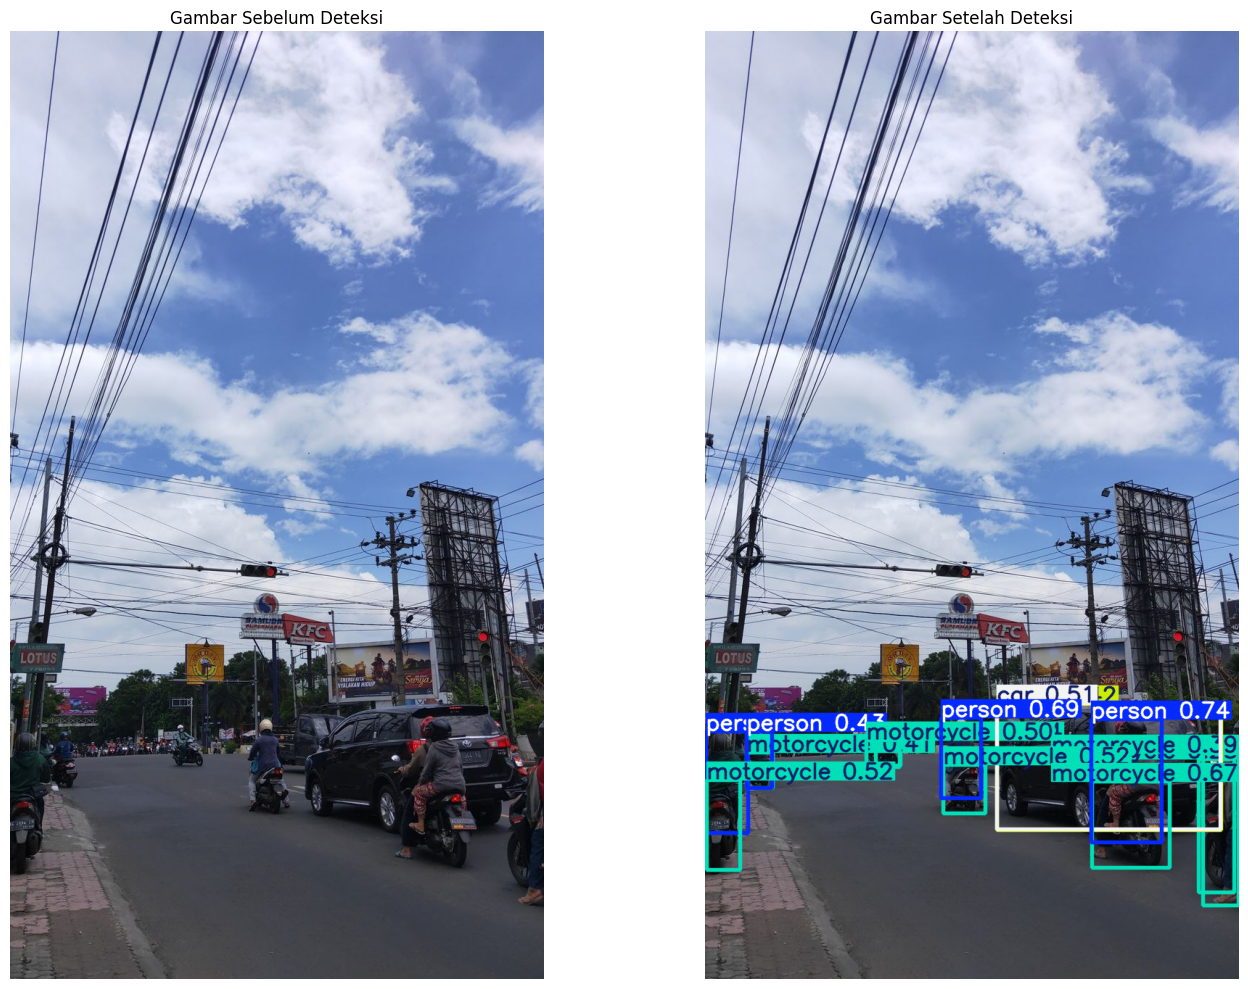

In [10]:

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# Path gambar
image_path = './jalan.jpg'

# Load the image for displaying before detection
image_before = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_before is None:
    print(f"Error: Could not load image from {image_path}. Please check the path.")
else:
    image_before = cv2.cvtColor(image_before, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib

    # Perform object detection
    results = model(image_path)

    image_after_np = results[0].plot() # results[0] because we processed a single image
    image_after_rgb = cv2.cvtColor(image_after_np, cv2.COLOR_BGR2RGB) # Convert BGR (from plot function) to RGB

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))

    # Display the before image
    axes[0].imshow(image_before)
    axes[0].set_title("Gambar Sebelum Deteksi")
    axes[0].axis('off')

    # Display the after image
    axes[1].imshow(image_after_rgb)
    axes[1].set_title("Gambar Setelah Deteksi")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [9]:
print("\nAnalisis Confidence Score:")
for result in results:
    boxes = result.boxes
    if len(boxes) > 0:
        print("DetailScore untuk setiap objek:")
        for box in boxes:
            cls = int(box.cls[0])
            conf = box.conf[0]
            label = model.names[cls]
            print(f"  - Objek '{label}': Confidence = {conf:.2f}")


Analisis Confidence Score:
Detail Confidence Score untuk setiap objek:
  - Objek 'person': Confidence = 0.74
  - Objek 'person': Confidence = 0.69
  - Objek 'motorcycle': Confidence = 0.67
  - Objek 'motorcycle': Confidence = 0.52
  - Objek 'motorcycle': Confidence = 0.52
  - Objek 'car': Confidence = 0.51
  - Objek 'motorcycle': Confidence = 0.50
  - Objek 'person': Confidence = 0.43
  - Objek 'truck': Confidence = 0.42
  - Objek 'motorcycle': Confidence = 0.41
  - Objek 'person': Confidence = 0.39
  - Objek 'motorcycle': Confidence = 0.39
  - Objek 'motorcycle': Confidence = 0.34
  - Objek 'motorcycle': Confidence = 0.25


Total objek yang terdeteksi: 14
Ringkasan per objek:
person

Jumlah: 4

Rata-rata Confidence: (0.74 + 0.69 + 0.43 + 0.39) / 4 = 0.5625

Confidence Terendah: 0.39

Confidence Tertinggi: 0.74

motorcycle

Jumlah: 7

Rata-rata Confidence: (0.67 + 0.52 + 0.52 + 0.50 + 0.41 + 0.39 + 0.25) / 7 = 0.4657

Confidence Terendah: 0.25

Confidence Tertinggi: 0.67

car

Jumlah: 1

Rata-rata Confidence: 0.51

Confidence Terendah & Tertinggi: 0.51

truck

Jumlah: 1

Rata-rata Confidence: 0.42

Confidence Terendah & Tertinggi: 0.42

| Aspek                 | Analisis                                                         |
| --------------------- | ---------------------------------------------------------------- |
| Objek yang Terdeteksi | person, motorcycle, car, truck                                   |
| Potensi Luput         | Mobil/truk lain, pejalan kaki tambahan                           |
| Potensi Salah Label   | motorcycle dengan confidence rendah → bisa objek lain yang mirip |
| Confidence Score      | Masuk akal secara umum, tapi perlu waspada pada confidence < 0.4 |


Total Frames: 307
Total Time: 59.55 s
Processing FPS: 5.16

Displaying the last processed frame:


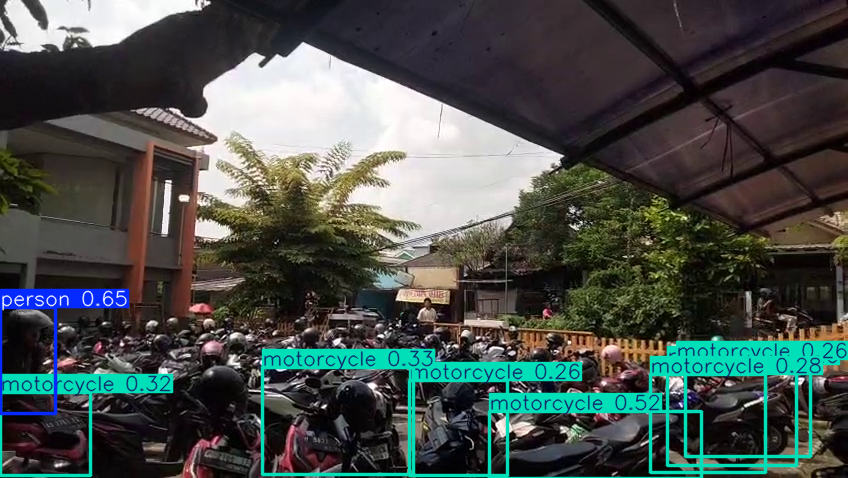

In [12]:
from google.colab.patches import cv2_imshow
from IPython.display import display, Image

video_path = './parkiran.mp4'

# Buka video
cap = cv2.VideoCapture(video_path)

# Inisialisasi FPS counter
frame_count = 0
start_time = time.time()


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Deteksi objek di frame (non verbose supaya clean)
    results = model(frame, imgsz=640, verbose=False)

    # Dapatkan frame dengan bounding box
    annotated_frame = results[0].plot()
    frame_count += 1

# Hitung FPS
elapsed_time = time.time() - start_time
fps = frame_count / elapsed_time if elapsed_time > 0 else 0
print(f'Total Frames: {frame_count}')
print(f'Total Time: {elapsed_time:.2f} s')
print(f'Processing FPS: {fps:.2f}')

# Release video and close writer if used
cap.release()

# To display the last processed frame:
if 'annotated_frame' in locals():
     print("\nDisplaying the last processed frame:")
     cv2_imshow(annotated_frame)

In [13]:
from roboflow import Roboflow
rf = Roboflow(api_key="RCEeXLSadJN3bi6nxOeh")
project = rf.workspace("dam-tpuul").project("drone-vs-bird-lanzg")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to drone-vs-bird-2 in yolov8:: 100%|██████████| 5852/5852 [00:01<00:00, 5045.21it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

# fine-tune training
model.train(
    data="/content/drone-vs-bird-2/data.yaml",
    epochs=5,
    batch=8,
    imgsz=640
)


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drone-vs-bird-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

train: Scanning /content/drone-vs-bird-2/train/labels.cache... 2044 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2044/2044 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 543.6±162.6 MB/s, size: 21.4 KB)



val: Scanning /content/drone-vs-bird-2/valid/labels.cache... 584 images, 0 backgrounds, 0 corrupt: 100%|██████████| 584/584 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.646      2.813      1.574         11        640: 100%|██████████| 256/256 [30:58<00:00,  7.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [03:06<00:00,  5.04s/it]

                   all        584        639      0.316      0.481      0.333      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.725      2.335       1.67         12        640:  85%|████████▍ | 217/256 [26:12<04:36,  7.09s/it]

In [ ]:
result = model.val()
print(result)


In [ ]:
model.predict(
    source="/drone-vs-bird-2/test/images",
    conf=0.25,
    save=True
)

In [ ]:
metrics = model.val()
print(f"mAP@0.5: {metrics.box.map:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map50:.4f}")